<a href="https://colab.research.google.com/github/sabrinabms/RNA-MPCA-students/blob/main/rna%26mpca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Rede Neural auto-configurada</h1>


In [24]:
# Importando as bibliotecas necessárias
import os.path
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
%cd /content

/content


In [3]:
# Verifica se pasta jah existe, se sim ela eh deletada para poder atualizar com
# a nova versao do Github

pasta = 'RNA-MPCA'

if os.path.isdir(pasta): # vemos que este diretorio já existe
  print ('Ja existe uma pasta com esse nome!')
  shutil.rmtree(pasta)

In [4]:
# Cria uma cópia de trabalho em um repositório local: Github

!git clone https://github.com/sabrinabms/RNA-MPCA-students.git
# !git pull

Cloning into 'RNA-MPCA-students'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 38 (delta 5), reused 34 (delta 4), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [6]:
%cd RNA-MPCA-students//

/content/RNA-MPCA-students


In [46]:
cwd = os.getcwd()
pasta_data = cwd+'/data/'
entrada = pd.read_csv(pasta_data + 'x_in.txt', encoding="utf-16", header=None, delimiter=r"\s+")
saida = pd.read_csv(pasta_data + 'y_in.txt',encoding="utf-16", header=None, delimiter=r"\s+")

In [47]:
entrada_num = entrada.to_numpy()
saida_num = saida.to_numpy()

In [48]:
entrada.shape, saida.shape

((5, 11250), (1, 11250))

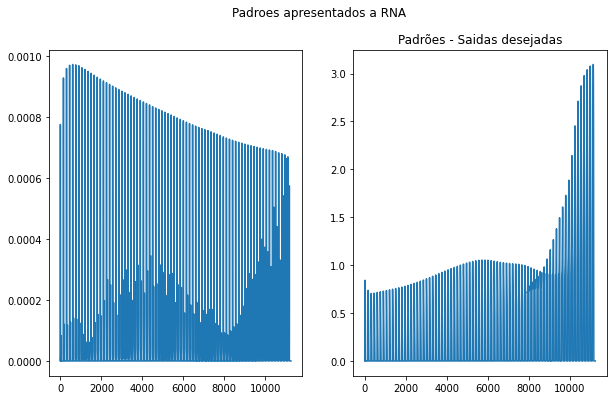

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle('Padroes apresentados a RNA')
axes[1].set_title('Padrões - Entrada')
axes[0].plot(entrada_num[0,0:11250])
axes[1].set_title('Padrões - Saidas desejadas')
axes[1].plot(saida_num[0,0:11250])

## Normalizando os dados de entrada e saida

In [50]:
min_entrada = entrada_num.min()
min_saida = saida_num.min()
max_entrada = entrada_num.max()
max_saida = saida_num.max()

In [51]:
#z = x - min(x) / max(x) - min(x)
entrada_norm = (entrada_num - min_entrada) / (max_entrada - min_entrada)
saida_norm = (saida_num - min_saida) / (max_saida - min_saida)

In [52]:
np.savetxt(pasta_data +'x.txt', entrada_norm, delimiter=" ") 
np.savetxt(pasta_data +'y.txt', saida_norm, delimiter=" ")

# **Iniciando o processo: RNA&MPCA**


In [53]:
!make clean
!make

rm -f build/*.o *.mod
rm -rf *.*~ Makefile~ build/*.o *.mod annActivation annTest annMPCA
mpif90 -c -O3 -g -w src/foul.f90 -o build/foul.o
mpif90 -c -O3 -g -w src/newTypes.f90 -o build/newTypes.o
mpif90 -c -O3 -g -w src/uniformR8.f90 -o build/uniformR8.o
mpif90 -c -O3 -g -w src/normalR8.f90 -o build/normalR8.o
mpif90 -c -O3 -g -w src/annTraining.f90 -o build/annTraining.o
mpif90 -c -O3 -g -w src/mpcaFunctions.f90 -o build/mpcaFunctions.o
mpif90 -c -O3 -g -w src/mpca.f90 -o build/mpca.o
mpif90 -c -O3 -g -w src/annActivation.f90 -o build/annActivation.o
mpif90 -c -O3 -g -w src/annGeneralization.f90 -o build/annGeneralization.o
mpif90 -c -O3 -g -w src/main_generalization.f90 -o build/main_generalization.o
mpif90 -c -O3 -g -w src/main_activation.f90 -o build/main_activation.o
mpif90 -O3 -g -w -o annMPCA build/foul.o build/uniformR8.o build/newTypes.o build/normalR8.o build/annTraining.o build/mpcaFunctions.o build/mpca.o
mpif90 -O3 -g -w -o annTest build/foul.o build/newTypes.o build/annGe

# **Definir no próximo bloco os valores das seguintes variáveis:**
*   **n_proc**: numero de processadores
*   **n_exp**: numero de experimentos

In [54]:
n_proc = 2
n_exp = 2

# Iniciando a fase de auto configuração da RNA

In [ ]:
!./runMPCA {n_exp} {n_proc}

make: Nothing to be done for 'all'.
************************************************************

                       Experiment   1                       

************************************************************

NFE (in processor 0):          22 of        500

# **EXECUTAR SOMENTE ATÉ AQUI!!!!**



# Com a RNA auto-configurada, inicia-se agora a fase de teste, um pequeno conjunto de dados é usado para verificar a resposta da RNA para o problema em questão

In [ ]:
!./annTest {n_exp} {n_proc}

 ************************************************************
 Num. exps:            2
 Num. procs:            2
 ************************************************************
 Best objective function value:   0.24242960000000000     
 Number of hidden layers:            2
 Neurons in hidden layer 1:            6
 Activation function:            3
 Alpha: 
 Eta: 
 Best result: ./output/ann1.best
 result_ys.out


# Agora a RNA já está configurada e testada, pronta para ativação, ou seja, qualquer conjunto de dados pertinente ao problema poderá ser usado para obter uma resposta




In [ ]:
!./annActivation

 ****************************************************************
                    RNA Activation
 ****************************************************************
 Number of activation classes:           50
  Number of hidden layers:            2
  Neurons in hidden layer 1:            6
  Neurons in hidden layer 2:           27


# Verificar o resultado da RNA através dos gráficos

In [ ]:
pasta_out = cwd+'/output/'
saida_out = pd.read_csv(pasta_out + 'result_ys.out', delim_whitespace=True)
# saida_act = pd.read_csv(pasta_out + 'y_activation.txt', delim_whitespace=True)

In [ ]:
saida_out_num = saida_out.to_numpy()
saida_out_num_t = saida_out_num.transpose()
saida_out_num_t.shape

(40, 79)

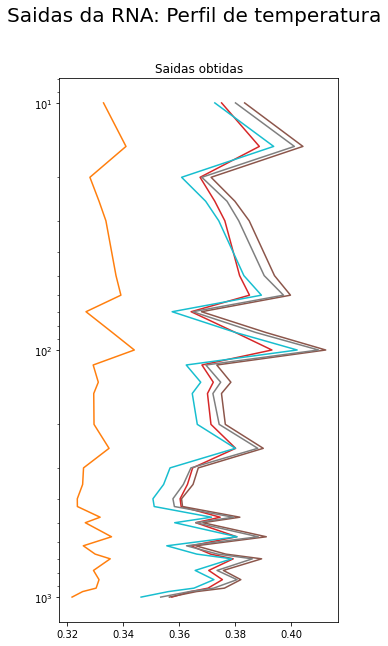

In [ ]:
f2_master, f2_axes = plt.subplots(figsize=(5,10))
f2_master.suptitle('Saidas da RNA: Perfil de temperatura', size = 20)
f2_axes.set_title('Saidas obtidas')
f2_axes.plot(saida_out_num_t[10:,0:10],eixo_y[10:])
f2_axes.set_yscale('log')
f2_axes.invert_yaxis()